In [1]:
# Load Necessary libraries
from skimage import data
from skimage.io import imread
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [2]:
# Read the original image
image = data.astronaut()

# Convert the image gray scale
image_org = rgb2gray(image)

In [3]:
# We prepare another image by rotating it. Only to demonstrate feature matching
image_rot = tf.rotate(image_org, 180)

# We create another image by applying affine transform on the image
tform = tf.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                           translation=(0, -200))
image_aff = tf.warp(image_org, tform)

# We initialize ORB feature descriptor
descriptor_extractor = ORB(n_keypoints=200)

In [4]:
# We first extract features from the original image
descriptor_extractor.detect_and_extract(image_org)
keypoints_org = descriptor_extractor.keypoints
descriptors_org = descriptor_extractor.descriptors

# Extract features from the rotated image
descriptor_extractor.detect_and_extract(image_rot)
keypoints_rot = descriptor_extractor.keypoints
descriptors_rot = descriptor_extractor.descriptors

# Extract features from the affine image
descriptor_extractor.detect_and_extract(image_aff)
keypoints_aff = descriptor_extractor.keypoints
descriptors_aff = descriptor_extractor.descriptors

matches_org_rot = match_descriptors(descriptors_org, descriptors_rot, cross_check=True)
matches_org_aff = match_descriptors(descriptors_org, descriptors_aff, cross_check=True)

/home/ratan/anaconda3/lib/python3.6/site-packages/skimage/feature/match.py:49: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  if np.issubdtype(descriptors1.dtype, np.bool):


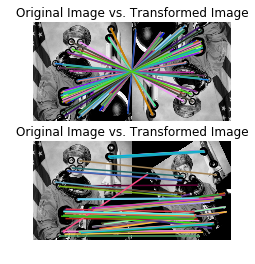

In [5]:
# Display image
fig, ax = plt.subplots(nrows=2, ncols=1)

plt.gray()

plot_matches(ax[0], image_org, image_rot, keypoints_org, keypoints_rot, matches_org_rot)
ax[0].axis('off')
ax[0].set_title("Original Image vs. Transformed Image")

plot_matches(ax[1], image_org, image_aff, keypoints_org, keypoints_aff, matches_org_aff)
ax[1].axis('off')
ax[1].set_title("Original Image vs. Transformed Image")

plt.savefig("Saved_images/ORB.jpg")
plt.show()